在回归术语中，我们把被预测的变量称为因变量（dependent variable），把用来预测因变量值的一个或多个变量称为自变量（independent variable）。

例如，在分析广告费用对销售收人的影响时，市场销售经理想要预测销售收入的愿望使我们想到，应该用销售收入作为因变量，而用来帮助预测销售收入的广告费用应作为自变量。

在统计符号上，$y$ 代表因变量，$x$ 代表自变量。

在本章中，我们仅仅讨论最简单类型的回归分析，它只包括一个自变量和一个因变量，二者之间的关
系可以用一条直线近似表示。这种回归分析被称为简单线性回归（simple linear regression）。

包括两个或两个以上自变量的回归分析被称为多元回归分析。多元回归和涉及曲线关系的情形，将在第 15 章和第 16 章中介绍。

# 简单线性回归模型

推荐教程：[Univariate Regression](http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-univariate-reg.html)

描述 $y$ 如何依赖于 $x$ 和误差项的方程称为回归模型（regression model）。

$$y = \beta_0 + \beta_1 x + \varepsilon$$

其中
- $\beta_0$ 和 $\beta_1$ 被称为模型的参数，不是一个随机变量，而是客观存在的，在现实中一定有的具体的量，正是因为有这两个参数，才使得 $x$ 可以影响 $y$。
- $\varepsilon$ 是一个随机变量，被称为模型的误差项。误差项说明了包含在 $y$ 里，但不能被 $x$ 和 $y$ 之间的线性关系解释的变异性。如果线性回归模型能够很好地描述 $y$ 的变动，那 $\varepsilon$ 一定是一个随机变动项，且均值为 0。

简单线性回归方程

$$E(y) = \beta_0 + \beta_1 x$$

- $\beta_0$ 是回归直线的 $y$ 轴截距
- $\beta_1$ 是斜率

## 样本估计的回归方程

$$\hat{y} = b_0 + b_1 x$$

- $b_0$ 和 $b_1$ 是总体参数 $\beta_0$ 和 $\beta_1$ 的样本估计量

总体回归直线只有一条，而样本回归直线，根据抽样结果的不同，会有很多条。

# 模型的假定

关于回归模型 $y=\beta_0 + \beta_1 x + \varepsilon$ 的误差项 $\varepsilon$ 的假定
1. 误差项 $\varepsilon$ 是一个平均值或期望值为 0 的随机变量，即 $E(\varepsilon) = 0$。

    这就意味着因为 $\beta_0$ 和 $\beta_1$ 都是常数，所以有 $E(\beta_0) = \beta_0$ 和 $E(\beta_1) = \beta_1$。对于一个给定的 $x$ 值，$y$ 的期望值是：

    $$E(y) = \beta_0 + \beta_1 x$$


2. 对所有的 $x$ 值，$\varepsilon$ 的方差都是相同的。我们用 $\sigma^2$ 表示 $\varepsilon$ 的方差。

    这就意味着 $y$ 关于回归直线的方差等于 $\sigma^2$ ，也就是说对所有的 $x$ 值，$y$ 的方差都是相等的。


3. $\varepsilon$ 的值是相互独立的。

    这就意味着对于一个特定的 $x$ 值，它所对应的值与任何其他的 $x$ 值所对应的值不相关。

    于是，对于一个特定的 $x$ 值，它所对应的 $y$ 值与任何其他的 $x$ 值所对应的 $y$ 值也不相关。


4. 对所有的 $x$ 值，误差项 $\varepsilon$ 是一个正态分布的随机变量。

    这就意味着因为 $y$ 是 $\varepsilon$ 的一个线性函数，所以对所有的 $x$ 值，$y$ 也是一个正态分布的随机变量。如果不是随机的，那就会产生内生性问题。

# 最小二乘法

最小二乘法是利用样本数据建立估计的回归方程的一种方法。（其中，二乘就是平方的意思）

假定由位于大学校园附近的 10 家 Armand 比萨饼连锁店组成了一个样本，并对这个样本采集有关数据。

对于样本中的第个观测值或第 i 家连锁店，$x_i$ 表示学生人数（单位：1000人），$y_i$ 表示季度销售收人（单位：1000美元）。

样本中 10 家 Armand 比萨饼连锁店的 $x_i$ 和 $y_i$ 的数值如下列所示。

我们看到对于第 1 家连锁店，$x_1=2$，$y_1=58$，表示这家连锁店位于有 2000 名学生的校园附近，它的季度销售收入为 58000 美元。

In [28]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from pathlib import Path
#设置数据文件夹路径
DATA = Path().resolve()  / 'data'

In [29]:
df = pd.read_csv(DATA / 'Armand\'s.csv')
df = df.set_index('Restaurant')
armand = df.iloc[:,0:2]
x = armand['Population']
y = armand['Sales']

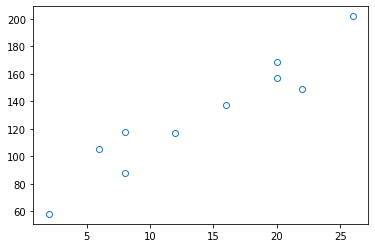

In [30]:
_ = plt.figure(0)
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor='none');
#_ = plt.legend(handles = legend_lines, loc = 'upper left')
plt.show()

最小二乘法准则

$$min\sum{(y_i - \hat{y}_i)^2}$$

其中：
- $y_i$ 为对于第 $i$ 次观测因变量的**观测**值；$\hat{y}_i$ 为对第 $i$ 次观测因变量的**预测**值，二者之差就是残差。残差是样本点与样本回归直线的**纵向距离**。实际上残差是样本回归直线不能够解释的，因变量方向的信息。

- 最小二乘法的目标，就是使得残差平方和最小。为什么要平方呢？因为方向有是正负，残差的原始值有可能是正的，也有可能是负的。平方是为了消除方向对计算的影响。

估计的回归方程的斜率和 $y$ 轴截距

$$b_1 = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}$$

$$b_0 = \bar{y} - b_1\bar{x}$$

下面我们展示一下，最小二乘法的运算过程：

In [31]:
armand['x_i - bar x'] = armand['Population'] - armand['Population'].mean()
armand['y_i - bar y'] = armand['Sales'] - armand['Sales'].mean()
armand['(x_i - bar x)(y_i - bar y)'] = armand['x_i - bar x'] * armand['y_i - bar y']
armand['(x_i - bar x)^2'] = pow(armand['x_i - bar x'],2)
armand

,Population,Sales,x_i - bar x,y_i - bar y,(x_i - bar x)(y_i - bar y),(x_i - bar x)^2
Restaurant,,,,,,
1,2,58,-12.0,-72.0,864.0,144.0
2,6,105,-8.0,-25.0,200.0,64.0
3,8,88,-6.0,-42.0,252.0,36.0
4,8,118,-6.0,-12.0,72.0,36.0
5,12,117,-2.0,-13.0,26.0,4.0
6,16,137,2.0,7.0,14.0,4.0
7,20,157,6.0,27.0,162.0,36.0
8,20,169,6.0,39.0,234.0,36.0
9,22,149,8.0,19.0,152.0,64.0


In [32]:
armand['(x_i - bar x)^2'].sum()

568.0

In [33]:
b_1 = armand['(x_i - bar x)(y_i - bar y)'].sum() / armand['(x_i - bar x)^2'].sum()
b_1

5.0

In [34]:
bar_y = armand['Sales'].mean()
bar_y

130.0

In [35]:
bar_x = armand['Population'].mean()
bar_x

14.0

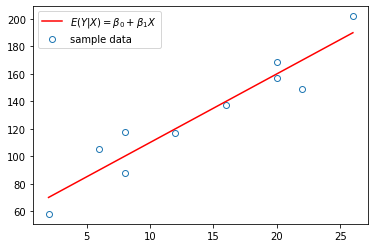

In [36]:
armand['y_ce'] = 60 + 5 * x
y_ce = armand['y_ce']

_ = plt.figure(0)
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor='none');
_ = plt.plot(x, y_ce, linestyle = "-", color = "red");
legend_lines = [Line2D([0], [0], color = "red", 
                        label='$E(Y|X) = \\beta_0 + \\beta_1 X$'),
                Line2D([0], [0], linestyle = "None", markerfacecolor = "None",
                      marker = "o", label='sample data')]
_ = plt.legend(handles = legend_lines, loc = 'upper left')
plt.show()

结合上面的结算结果可得：
- $b_1 = 5$
- $\bar{x} = 14$
- $\bar{y} = 130$
- $b_0 = \bar{y} - b_1 \bar{x} = 130 - 5 \times 14 = 60$

估计的回归方程是：

$$\hat{y} = 60 + 5x$$

我们再看一下，估计的回归方程的斜率和 $y$ 轴截距

$$b_1 = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}$$

可以将其转化成

$$b_1 = \frac{Cov\left(x, y\right)}{Var\left(x\right)}$$

$$b_0 = \bar{y} - b_1\bar{x}$$

下面我们用一个随机生成的数据集来进行演示

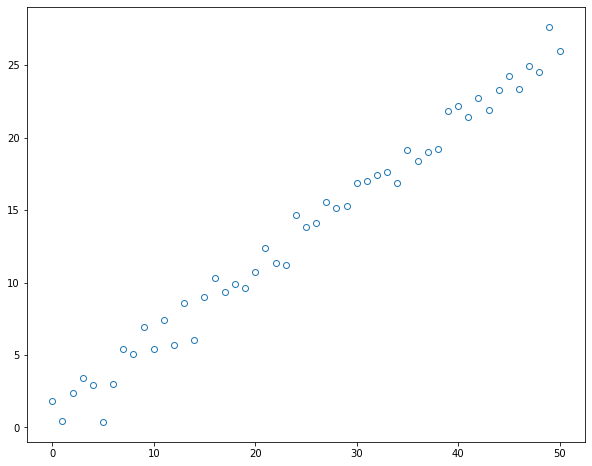

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
np.random.seed(234)
# Set the coefficients:
N = 50
beta_0 = 1
beta_1 = 0.5
# Generate sample data:
x = np.arange(start = 0, stop = N + 1, step = 1)
#x = list(range(0, N + 1)) # not np.ndarray 
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + e
# Plot the data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.show()

In [4]:
beta_1_est = np.cov(x, y, bias = True)[0][1] / np.var(x)
beta_0_est = np.mean(y) - beta_1_est * np.mean(x)
print("Estimated beta_0 = " + str(beta_0_est) + ". True beta_0 = " + str(beta_0))
print("Estimated beta_1 = " + str(beta_1_est) + ". True beta_1 = " + str(beta_1))
print("With bias = False (default) the estimate of beta_1 is biased: " + str(np.cov(x, y)[0][1] / np.var(x)))
print("With sample variance the estimate of beta_1 is unbiased: " +  str(np.cov(x, y)[0][1] / np.var(x, ddof = 1)))

Estimated beta_0 = 0.8385362094098401. True beta_0 = 1
Estimated beta_1 = 0.5099221954865624. True beta_1 = 0.5
With bias = False (default) the estimate of beta_1 is biased: 0.5201206393962936
With sample variance the estimate of beta_1 is unbiased: 0.5099221954865624


除了使用协方差，我们也可以使用矩阵计算出两个参数

In [5]:
x_mat = np.column_stack((np.ones(len(x)), x))
beta_mat = np.dot(np.linalg.inv(np.dot(np.transpose(x_mat), x_mat)), np.dot(np.transpose(x_mat), y))
print(beta_mat)
print(np.linalg.inv(x_mat.T @ x_mat) @ x_mat.T @ y)

[0.83853621 0.5099222 ]
[0.83853621 0.5099222 ]


In [6]:
import statsmodels.api as sm
#
x_mat = sm.add_constant(x)  # Add a constant column - not optional!
lm_model = sm.OLS(y, x_mat) # Create the OLS regression object
lm_fit = lm_model.fit()     # Estimate the parameters
print(lm_fit.params)        # Extract the parameter estimates

[0.83853621 0.5099222 ]


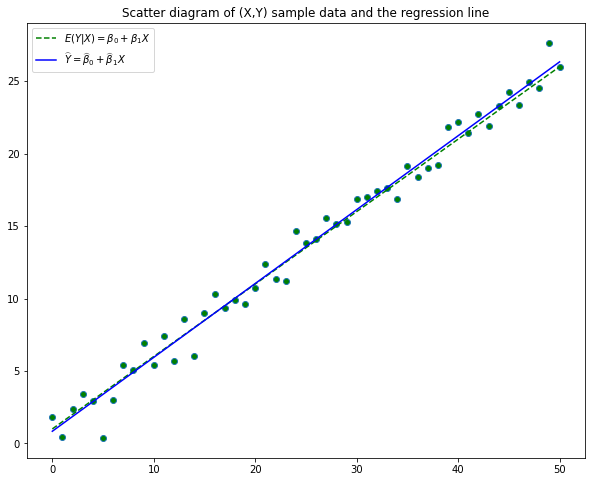

In [7]:
# The unknown DGP:
y_dgp = beta_0 + beta_1 * x
# The fitted values:
y_fit = beta_mat[0] + beta_mat[1] * x
# Plot the sample data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'green')
_ = plt.title("Scatter diagram of (X,Y) sample data and the regression line")
# Plot the Unknown Population regression:
_ = plt.plot(x, y_dgp, linestyle = "--", color = "green", 
              label='$E(Y|X) = \\beta_0 + \\beta_1 X$')
# Plot the fitted regression line:
_ = plt.plot(x, y_fit, linestyle = "-", color = "blue",
              label='$\widehat{Y} = \widehat{\\beta}_0 + \widehat{\\beta}_1 X$')
_ = plt.legend()
plt.show()

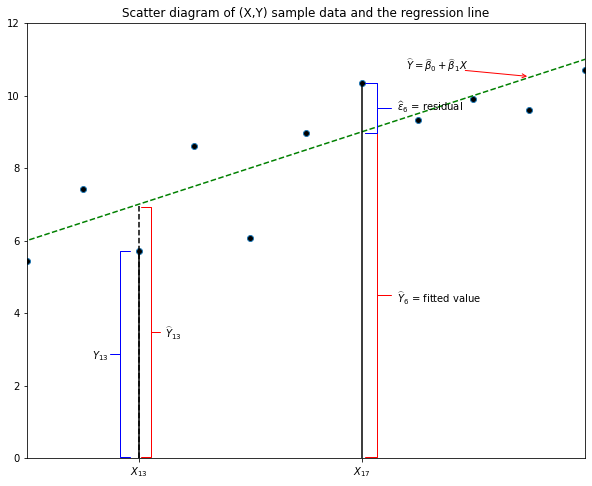

In [8]:
_ = plt.figure(num = 1, figsize=(10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'black')
_ = plt.ylim(ymin = 0, ymax = 12)
_ = plt.xlim(xmin = 10, xmax = 20)
_ = plt.title("Scatter diagram of (X,Y) sample data and the regression line")
_ = plt.plot(x, y_dgp, linestyle = "--", color = "green")
# Add Axis labels and ticks at specific positions:
_ = plt.xticks([x[12], x[16]], ["$X_{13}$", "$X_{17}$"])
# Add vertical lines:
_ = plt.plot([x[12], x[12]], [0, y_fit[12]], '--', color = "black")
_ = plt.plot([x[12], x[12]], [0, y[12]], '-', color = "black")
_ = plt.plot([x[16], x[16]], [0, y[16]], '-', color = "black")
# Add some brackets:
_ = plt.annotate("", xy = (x[12]*0.955, y[12] / 2), 
             xytext = (x[12]*0.975, y[12] / 2),
             arrowprops = dict(arrowstyle = "]-, widthA=10.3,lengthA=1",
                               connectionstyle = "arc", color='blue'))
_ = plt.annotate("", xy = (x[12]*1.015, y_fit[12] / 2),
             xytext = (x[12]*1.035, y_fit[12] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=12.5,lengthB=1",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[16]*1.015, y_fit[16] / 2), 
             xytext = (x[16]*1.035, y_fit[16] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=16.2,lengthB=1.2",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[16]*1.015, (y[16] + y_fit[16]) / 2),
             xytext = (x[16]*1.035, (y[16] + y_fit[16]) / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=2.5,lengthB=1.2",
                               connectionstyle = "arc", color='blue'))
# Add Actual, Fitted and Residual indicator text:
_ = plt.text(x[12]*0.93, y[12] / 2.1, r'$Y_{13}$', fontsize = 10)
_ = plt.text(x[12]*1.04, y_fit[12] / 2.1, r'$\widehat{Y}_{13}$', fontsize = 10)
_ = plt.text(x[16]*1.04, y_fit[16] / 2.1, 
  r'$\widehat{Y}_6$ = fitted value', fontsize = 10)
_ = plt.text(x[16]*1.04, (y[16] + y_fit[16]) / 2.02, 
  r'$\widehat{\epsilon}_6$ = residual', fontsize = 10)
# Add Regression line
_ = plt.text(x[17] - 0.2, y[20], 
  r'$\widehat{Y} = \widehat{\beta}_0 + \widehat{\beta}_1 X$', fontsize = 10)
_ = plt.annotate("", xy = (x[19], y_fit[19]), xytext = (x[18]*0.99, y[20]),
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "arc", color='red'))
plt.show()

In [10]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [56]:
resid = y - y_fit
print("Sum of the residuals: " + str(sum(resid)))
print("Sum of X*resid: " + str(sum(np.array(resid) * np.array(x))))
print("Sample covariance of X and residuals: " + str(np.cov(resid, x)[0][1]))
print("Predicted value with mean(X): " + str(beta_mat[0] + beta_mat[1] * np.mean(x)))
print("Sample mean of Y: " + str(np.mean(y)))

sigma2_est = sum(resid**2) / (len(x) - 2)
var_beta = sigma2_est * np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
print(np.sqrt(np.diag(var_beta)))
print(lm_fit.bse)

Sum of the residuals: 2.2160051571518125e-13
Sum of X*resid: 9.563905223330949e-12
Sample covariance of X and residuals: 8.054223954445661e-14
Predicted value with mean(X): 13.586591096573896
Sample mean of Y: 13.5865910965739
[0.26999713 0.00930656]
[0.26999713 0.00930656]


In [57]:
np.random.seed(1)
# Set the sample size:
N = [10, 100, 1000]
#
beta_0_est = []
beta_1_est = []
# Generate samples of different sizes:
for n in N:
    x = np.arange(start = 0, stop = n + 1, step = 1)
    x_mat = np.column_stack((np.ones(len(x)), x))
    xtx = np.dot(np.transpose(x_mat), x_mat)
    # Repeatedly generate a random sample and estimate the parameters
    beta_0_temp = []
    beta_1_temp = []
    for smpl in range(0, 5000):
        # Generate Y:
        e = np.random.normal(loc = 0, scale = 1, size = len(x))
        y = beta_0 + beta_1 * x + e
        # Estimate the parameters:
        xty = np.dot(np.transpose(x_mat), y)
        beta_mat = np.dot(np.linalg.inv(xtx), xty)
        # Save the estimated parameters:
        beta_0_temp = np.append(beta_0_temp, [beta_mat[0]])
        beta_1_temp = np.append(beta_1_temp, [beta_mat[1]])
    # Save all the estimated parameters to one parameter matrix
    # each column represents the different sample size from N:
    if len(beta_0_est) == 0 and len(beta_1_est) == 0:
        beta_0_est = beta_0_temp
        beta_1_est = beta_1_temp
    else:
        beta_0_est = np.vstack((beta_0_est, beta_0_temp))
        beta_1_est = np.vstack((beta_1_est, beta_1_temp))

In [68]:
print("True beta_0 = " + str(beta_0) + ". True beta_1 = " + str(beta_1))
for i in range(0, len(N)):
    print("With N = " + str(N[i]) + ":" +
          " the AVERAGE of the estimated parameters:" +
          "\n\t beta_0: " + str(np.round(np.mean(beta_0_est[i]), 5)) +
          "\n\t beta_1: " + str(np.round(np.mean(beta_1_est[i]), 5)))
    print("With N = " + str(N[i]) + ":" +
          " the VARIANCE of the estimated parameters:" +
          "\n\t beta_0: " + str(np.round(np.var(beta_0_est[i]), 5)) + 
          "\n\t beta_1: " + str(np.round(np.var(beta_1_est[i]), 5)))
    print("\n")

True beta_0 = 1. True beta_1 = 0.5
With N = 10: the AVERAGE of the estimated parameters:
	 beta_0: 1.00437
	 beta_1: 0.49984
With N = 10: the VARIANCE of the estimated parameters:
	 beta_0: 0.3178
	 beta_1: 0.00904


With N = 100: the AVERAGE of the estimated parameters:
	 beta_0: 0.99789
	 beta_1: 0.50006
With N = 100: the VARIANCE of the estimated parameters:
	 beta_0: 0.03896
	 beta_1: 1e-05


With N = 1000: the AVERAGE of the estimated parameters:
	 beta_0: 0.99957
	 beta_1: 0.5
With N = 1000: the VARIANCE of the estimated parameters:
	 beta_0: 0.00394
	 beta_1: 0.0




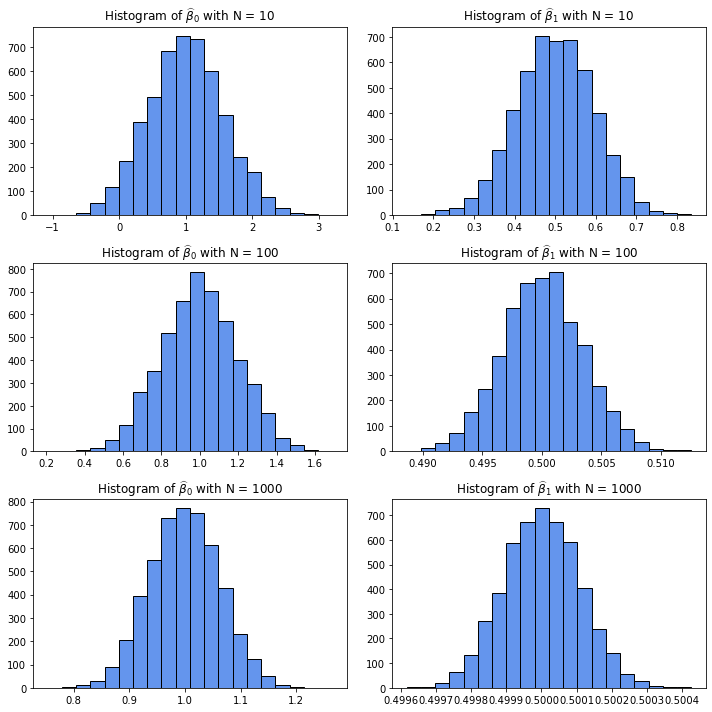

In [65]:
fig = plt.figure(figsize = (10, 10))
for i in range(0, len(N)):
    _ = fig.add_subplot(int('32' + str(i*2+1))).hist(beta_0_est[i], 
                    bins = 20, histtype = 'bar', 
                    color = "cornflowerblue", ec = 'black')
    _ = plt.title("Histogram of $\\widehat{\\beta}_0$ with N = " + str(N[i]))
    _ = fig.add_subplot(int('32' + str((i+1)*2))).hist(beta_1_est[i], 
                    bins = 20, histtype = 'bar', 
                    color = "cornflowerblue", ec = 'black')
    _ = plt.title("Histogram of $\\widehat{\\beta}_1$ with N = " + str(N[i]))
plt.tight_layout()
plt.show()

$\beta_0$ 和 $\beta_1$ 的几何意义：
- $\beta_0$：纵截距
- $\beta_1$：自变量 $x$：变动 a 个单位时，因变量 y 的变动幅度为 $\beta_1 \times x$ 

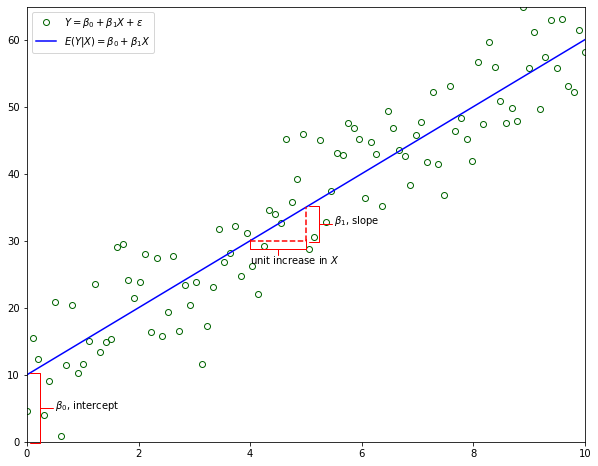

In [69]:
np.random.seed(123)
#
N = 100
beta_0 = 10
beta_1 = 5
x = np.linspace(start = 0, stop = 10, num = N)
e = np.random.normal(loc = 0, scale = 5, size = len(x))
y = beta_0 + beta_1 * x + e
# Conditional expectation of Y, given X
E_y = beta_0 + beta_1 * x
# Plot the data
_ = plt.figure(num = 1, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", 
            label = "$Y = \\beta_0 + \\beta_1 X + \\epsilon$",
            markerfacecolor = 'None', markeredgecolor = "darkgreen")
_ = plt.margins(x = 0)
_ = plt.ylim([0, max(y)])
# Plot the conditional expectation E(Y|X)
_ = plt.plot(x, E_y, linestyle = "-", color = "blue", 
            label='$E(Y|X) = \\beta_0 + \\beta_1 X$')
# plot beta_0
_ = plt.annotate("", xy = (0.5, E_y[0] / 2), 
             xytext = (0.2, E_y[0] / 2),
             arrowprops = dict(arrowstyle = "]-, widthA=3.5,lengthA=1",
                               connectionstyle = "arc", color='red'))
_ = plt.text(0.5, E_y[0] / 2, '$\\beta_0$, intercept', fontsize = 10)
# plot beta_1
_ = plt.plot([4, 5], [beta_0 + beta_1 * 4]*2, 
            linestyle = "--", color = "red")
_ = plt.plot([5, 5], beta_0 + beta_1 * np.array([4, 5]), 
            linestyle = "--", color = "red")
_ = plt.annotate("", xy = (5.5, beta_0 + beta_1 * 4.5), 
             xytext = (5.2, beta_0 + beta_1 * 4.5),
             arrowprops = dict(arrowstyle = "]-, widthA=1.8,lengthA=1",
                               connectionstyle = "arc", color='red'))
_ = plt.text(4, beta_0 + beta_1 * 3.3, 'unit increase in $X$', fontsize = 10)
_ = plt.annotate("", xy = (4.5, beta_0 + beta_1 * 3.5), 
             xytext = (4.5, beta_0 + beta_1 * 3.8),
             arrowprops = dict(arrowstyle = "]-, widthA=2.8,lengthA=1",
                               connectionstyle = "arc", color='red'))
_ = plt.text(5.5, beta_0 + beta_1 * 4.5, '$\\beta_1$, slope', fontsize = 10)
_ = plt.legend()
plt.show()

# 判定系数

判定系数由三个部分组成：

- 总平方和：代表全部数据的离散程度

$$ SST = \sum{(y_i - \bar{y})^2} $$

- 回归平方和：具体的样本回归方程 $\hat{y}$ 和整体的回归直线 $\bar{y}$ 之间的距离。SSR 实际上就是回归方程能够解释的那部分离散程度。

$$ SSR = \sum{(\hat{y} - \bar{y})^2} $$

- 误差平方和：

$$ SSE = \sum{(y_i - \hat{y}_i)^2} $$

- $y_i$：因变量的观测值
- $\hat{y}_i$：因变量的预测值
- $\bar{y}$：因变量的均值

$$ SST = SSR + SSE $$

$$ r^2 = \frac{SSR}{SST} $$

实际的意义就是：回归方程，整体而言，在多大程度上能够解释全部的数据离散程度（离散程度 = 数据蕴含的的信息）。

决定系数：现有的方程能够诠释多少原始的统计信息。

我们来看看，案例数据的这几个统计量：

In [10]:
df = pd.read_csv(DATA / 'Armand\'s.csv')
df = df.set_index('Restaurant')
armand = df.iloc[:,0:2]
armand.head()

,Population,Sales
Restaurant,,
1,2,58
2,6,105
3,8,88
4,8,118
5,12,117


In [43]:
armand['hat y'] = 60 + 5 * armand['Population']
armand['y_i - hat y'] = armand['Sales'] - armand['hat y']
armand['SSE'] = pow(armand['y_i - hat y'], 2)
armand['y_i - bar y'] = armand['Sales'] - armand['Sales'].mean()
armand['SST'] = pow(armand['y_i - bar y'], 2)
armand['hat y - bar y'] = armand['hat y'] - armand['Sales'].mean()
armand['SSR'] = pow(armand['hat y - bar y'], 2)
armand

,Population,Sales,y_ce,x_i - bar x,y_i - bar y,(x_i - bar x)(y_i - bar y),(x_i - bar x)^2,hat y,y_i - hat y,SSE,SST,hat y - bar y,SSR
Restaurant,,,,,,,,,,,,,
1,2,58,70,-12.0,-72.0,864.0,144.0,70,-12,144,5184.0,-60.0,3600.0
2,6,105,90,-8.0,-25.0,200.0,64.0,90,15,225,625.0,-40.0,1600.0
3,8,88,100,-6.0,-42.0,252.0,36.0,100,-12,144,1764.0,-30.0,900.0
4,8,118,100,-6.0,-12.0,72.0,36.0,100,18,324,144.0,-30.0,900.0
5,12,117,120,-2.0,-13.0,26.0,4.0,120,-3,9,169.0,-10.0,100.0
6,16,137,140,2.0,7.0,14.0,4.0,140,-3,9,49.0,10.0,100.0
7,20,157,160,6.0,27.0,162.0,36.0,160,-3,9,729.0,30.0,900.0
8,20,169,160,6.0,39.0,234.0,36.0,160,9,81,1521.0,30.0,900.0
9,22,149,170,8.0,19.0,152.0,64.0,170,-21,441,361.0,40.0,1600.0


In [44]:
armand['SSE'].sum()

1530

In [45]:
armand['SSR'].sum()

14200.0

In [46]:
armand['SST'].sum()

15730.0

In [47]:
r_square = armand['SSR'].sum()/armand['SST'].sum()
r_square

0.9027336300063573

# 显著性检验

在一个简单线性回归方程里，$y$ 的平均值或期望值是 $x$ 的一个线性函数，即 $E(y)=\beta_0 + \beta_1 x$。如果 $\beta_1$ 的值是 0，$E(y)=\beta_0 + 0x =\beta_0$。在这种情况下，$y$ 的平均值或期望值不依赖于 $x$ 的值，因此我们的结论是两变量 $x$ 和 $y$ 之间不存在线性关系。

换一种说法，如果 $\beta_1$ 的值不等于 0，我们的结论是两变量 $x$ 和 $y$ 之间存在线性关系。于是，为了检验两变量之间是否存在一个显著的回归关系，我们必须进行一个假设检验，用来判定 $\beta_1$ 的值是否等于0。

通常使用的检验方法有两种，这两种方法都需要知道回归模型误差项 $\varepsilon$ 的方差 $\sigma^2$ 的估计值。

## $\sigma^2$ 的估计
从回归模型和它的假定中，我们可以得出结论，$\varepsilon$ 的方差 $\sigma^2$ 也是因变量 $y$ 的值关于回归直线的方差。

回想一下，我们曾经将 $y$ 的值关于估计的回归直线的离差 $y_i - \hat{y}_i$ 称为残差。所以，残差平方和 SSE 是实际观测值关于估计的回归直线变异性的度量。我们用 SSE 除以它自己的自由度，得到均方误差（mean square error，MSE）。均方误差给出了 $\sigma^2$ 的一个估计量。

因为 $\hat{y} = b_0 + b_1 x$，所以 SSE 可以写成：

$$ SSE = \sum{(y_i - \hat{y}_i)^2} = \sum{(y_i - b_0 -b_1 x_i)^2} $$

回顾一下方差的计算公式：

$$\displaystyle Var=\frac{\sum(离差)^2}{样本数}=\frac{\sum(y_i-\bar{y})^2}{n}$$

由于我们估计 $y_i$ 的均值 $\bar{y} = \hat{y}_i$，所以我们可以用 $\hat{y}_i$ 替换 $\bar{y}$。

总体均方误差（$\sigma^2$ 的估计量）又称估计的方差

$$s^2 = MSE = \frac{SSE}{n-2}$$

为什么这里的自由度是 $n-2$ 呢？因为我们之前计算 SSE 的时候，必须估计两个参数 $\beta_0$ 和 $\beta_1$，所以自由度是  $n-2$ 

由于我们之前已经得到 SSE = 1530，于是 $\sigma^2$ 的一个无偏估计是：

$$s^2 = MSE = \frac{SSE}{n-2} = \frac{1530}{10-2} = 191.25$$

$$s = \sqrt{MSE} = 13.829$$

实际上，最小二乘的估计量 $b_0$ 和 $b_1$ 是一个样本统计量，有自己的抽样分布（服从正态分布），$b_1$ 抽样分布的性质如下：
- 期望值：$E(b_1) = \beta_1$
- 标准差：
$$\sigma_{b_1} = \frac{\sigma}{\sqrt{\sum{(x_i - \bar{x})^2}}}$$

如果我们此时想对简单线性回归模型 $y = \beta_0 + \beta_1 x + \varepsilon$，进行检验，如果 $x$ 和 $y$ 之间存在一个线性关系，必须有 $\beta_1 \ne 0$。$t$ 检验的目的是我们能否断定 $\beta_1 \ne 0$。因此需要利用样本来检验下面关于参数 $\beta_1$ 的假设：

\$$H_0: \beta_1 = 0 \ \ \ \ \ H_{\alpha}: \beta_1 \ne 0$$

回顾一下，根据总体标准差估计样本标准差的方式：

$$s_\bar{X} = \frac{总体标准差}{\sqrt{样本数量}} = \frac{s}{\sqrt{n}}$$

根据总体的均方误差（$\sigma^2$ 的估计量），我们可以计算出样本回归方程 $\hat{y} = b_0 + b_1 x$ 的 $b_1$ 标准差：

$$s_{b_1} = \frac{s}{\sqrt{\sum{(x_i - \bar{x})^2}}}$$

>为什么这里能把样本数量，换成 $\sum{(x_i - \bar{x})^2}$ 呢？我在学的时候也没有搞明白。

由于我们已知 $s = 13.829$，$\sum{(x_i - \bar{x})^2} = 568$，则我们可以知道 $b_1$ 的估计的标准差为：

$$s_{b_1} = \frac{13.829}{\sqrt{568}} = 0.5803$$

对于两个变量之间是否存在一个显著关系的 $t$ 检验的依据是检验统计量

$$t = \frac{b_1 - \beta_1}{s_{b_1}}$$

如果零假设成立，则 $\beta_1 = 0$，此时

$$t = \frac{b_1 - \beta_1}{s_{b_1}} = \frac{b_1}{s_{b_1}} = \frac{5}{0.5803} = 8.62$$

显然我们可以拒绝零假设。

这里计算的方差，实际上是每个样本点的 $y_i$ 值，与回归方程 $\hat{y}_i$ 的偏差，也就是前文提到的误差项 $\varepsilon$，误差项 $\varepsilon$ 是一个平均值或期望值为 0 的随机变量，即 $E(\varepsilon) = 0$。

估计的标准误差 $s_y$ 是对各观测数据在回归直线周围分散程度的一个度量值，可以证明 $s_y$ 是对误差项 $\varepsilon$ 的标准差  $\sigma$ 的无偏估计。

$$s_y = \sqrt{\frac{SSE}{n-2}} = \sqrt{MSE}$$

估计的标准误差 $s_y$ 反映了用估计的回归方程拟合因变量 $y$ 时平均误差的大小：
- 观测数据越靠近回归直线，$s_y$ 就越小，回归直线对各观测数据的代表性就越好
- 与 $r^2$ 不同，估计标准误差是一个有单位的绝对数